<a href="https://colab.research.google.com/github/alexandra-hidalgo/datasci_7_geospatial/blob/main/Geospatial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [ ]:
import requests
import urllib.parse
import json
import pandas as pd
import geopandas as gpd

# First Geospatial Dataset

In [ ]:
Schools = gpd.read_file('Postsecundary.geojson')
Schools

,OBJECTID,UNITID,NAME,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry
0,1,100654,Alabama A & M University,4900 Meridian Street,Normal,AL,35762,01,01089,Madison County,...,1,290,"Huntsville-Decatur, AL",N,N,0105,01019,01007,2021-2022,POINT (-86.56851 34.78337)
1,2,100663,University of Alabama at Birmingham,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,01,01073,Jefferson County,...,1,142,"Birmingham-Hoover-Talladega, AL",N,N,0107,01055,01018,2021-2022,POINT (-86.79935 33.50570)
2,3,100690,Amridge University,1200 Taylor Rd,Montgomery,AL,36117-3553,01,01101,Montgomery County,...,1,388,"Montgomery-Selma-Alexander City, AL",N,N,0102,01074,01025,2021-2022,POINT (-86.17401 32.36262)
3,4,100706,University of Alabama in Huntsville,301 Sparkman Dr,Huntsville,AL,35899,01,01089,Madison County,...,1,290,"Huntsville-Decatur, AL",N,N,0105,01006,01002,2021-2022,POINT (-86.64045 34.72456)
4,5,100724,Alabama State University,915 S Jackson Street,Montgomery,AL,36104-0271,01,01101,Montgomery County,...,1,388,"Montgomery-Selma-Alexander City, AL",N,N,0107,01077,01026,2021-2022,POINT (-86.29568 32.36432)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6842,6843,497301,Avalon Institute-Las Vegas,"2650 South Decatur Boulevard Suites 1, 6, 8-10",Las Vegas,NV,89102-0046,32,32003,Clark County,...,1,332,"Las Vegas-Henderson, NV",N,N,3201,32010,32003,2021-2022,POINT (-115.20642 36.14236)
6843,6844,497310,Medspa Academies-National Institute of Modern ...,3993 Howard Hughes Parkway Suite 150,Las Vegas,NV,89169-6745,32,32003,Clark County,...,1,332,"Las Vegas-Henderson, NV",N,N,3201,32016,32010,2021-2022,POINT (-115.15818 36.11724)
6844,6845,497329,American Institute-Cherry Hill,2201 Route 38 8th Floor,Cherry Hill,NJ,08002-4309,34,34007,Camden County,...,1,428,"Philadelphia-Reading-Camden, PA-NJ-DE-MD",N,N,3401,34006,34006,2021-2022,POINT (-75.01542 39.93944)
6845,6846,497338,Glendale Career College-North-West College-Bak...,3000 Ming Avenue,Bakersfield,CA,93304-5075,06,06029,Kern County,...,1,N,N,N,N,0623,06034,06016,2021-2022,POINT (-119.03509 35.33996)


In [ ]:
Schools.columns

Index(['OBJECTID', 'UNITID', 'NAME', 'STREET', 'CITY', 'STATE', 'ZIP', 'STFIP',
       'CNTY', 'NMCNTY', 'LOCALE', 'LAT', 'LON', 'CBSA', 'NMCBSA', 'CBSATYPE',
       'CSA', 'NMCSA', 'NECTA', 'NMNECTA', 'CD', 'SLDL', 'SLDU', 'SCHOOLYEAR',
       'geometry'],
      dtype='object')

In [ ]:
Schools.dtypes

OBJECTID         int64
UNITID          object
NAME            object
STREET          object
CITY            object
STATE           object
ZIP             object
STFIP           object
CNTY            object
NMCNTY          object
LOCALE          object
LAT            float64
LON            float64
CBSA            object
NMCBSA          object
CBSATYPE        object
CSA             object
NMCSA           object
NECTA           object
NMNECTA         object
CD              object
SLDL            object
SLDU            object
SCHOOLYEAR      object
geometry      geometry
dtype: object

In [ ]:
Schools[['UNITID', 'LAT']].sort_values(by=['UNITID'], ascending=False)

,UNITID,LAT
6846,497347,44.708803
6845,497338,35.339951
6844,497329,39.939428
6843,497310,36.117236
6842,497301,36.142355
...,...,...
4,100724,32.364317
3,100706,34.724557
2,100690,32.362609
1,100663,33.505697


In [ ]:
Schools['LAT'] = (Schools['LAT'] / 1000)

<Axes: >

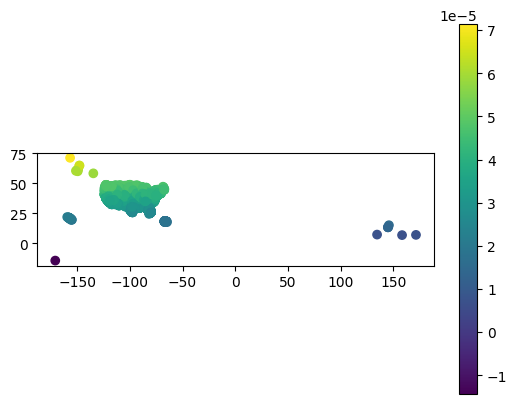

In [ ]:
Schools.plot("LAT", legend=True)

# Second Geospatial Dataset

In [ ]:
df = gpd.read_file('HDR.geojson')
df

,OBJECTID,ZIP,Anxiety_Di,Mood_Disor,Alcohol_re,Diabetes,Hypertensi,Asthma,F65_FallsER,Discharges,MH_ER,Total_MH,Total_ACSC,SHAPE_Length,SHAPE_Area,geometry
0,1,60002,393.608997,359.322499,270.177604,69.637883,20.481730,31.405320,14.946770,9590.103093,837.276281,1452.376054,0.0,0.730857,0.011686,"MULTIPOLYGON (((-87.95158 42.49462, -87.95238 ..."
1,2,60010,132.835014,153.848463,177.863833,43.503045,19.501365,16.501155,9.941825,8955.508619,388.936419,733.969741,0.0,0.585157,0.008129,"MULTIPOLYGON (((-88.11591 42.24075, -88.11719 ..."
2,3,60015,142.476163,231.371546,147.347143,18.720048,16.224042,6.240016,19.079395,8240.135205,496.383297,778.139042,0.0,0.371889,0.003720,"MULTIPOLYGON (((-87.85212 42.20407, -87.85280 ..."
3,4,60020,201.704730,452.208992,406.662763,90.111739,66.081942,60.074492,23.283437,13394.283515,911.331251,1506.278873,0.0,0.299823,0.001693,"MULTIPOLYGON (((-88.16098 42.41559, -88.15756 ..."
4,5,60030,261.648844,237.033796,250.708822,56.958420,37.972280,37.972280,20.297185,10486.759142,666.999426,1156.907256,0.0,0.796327,0.008580,"MULTIPOLYGON (((-87.99991 42.36220, -87.99876 ..."
5,6,60031,240.857947,234.704641,178.445851,60.977830,31.854090,29.123739,20.239979,8939.144091,598.628692,962.552743,0.0,0.533165,0.005353,"MULTIPOLYGON (((-87.92865 42.41420, -87.92713 ..."
6,7,60035,129.593011,256.951660,245.779848,25.992225,14.691258,19.211645,18.579208,10150.264976,688.323223,959.658589,0.0,0.372889,0.003501,"MULTIPOLYGON (((-87.80925 42.22496, -87.80912 ..."
7,8,60040,123.456790,308.641975,320.987654,18.072289,6.024096,6.024096,12.860082,9593.675308,685.185185,1037.037037,0.0,0.080798,0.000180,"MULTIPOLYGON (((-87.80793 42.21416, -87.80724 ..."
8,9,60042,261.025401,374.006545,214.274583,89.011167,16.183849,56.643470,13.879149,9951.332561,743.630201,1351.877825,0.0,0.135803,0.000458,"MULTIPOLYGON (((-88.17899 42.26233, -88.17905 ..."
9,10,60044,182.450343,230.644773,289.166581,35.961815,26.154047,22.884791,12.992508,9021.992500,575.751317,1025.852869,0.0,0.293811,0.002158,"MULTIPOLYGON (((-87.89245 42.30946, -87.89228 ..."


In [ ]:
df.columns

Index(['OBJECTID', 'ZIP', 'Anxiety_Di', 'Mood_Disor', 'Alcohol_re', 'Diabetes',
       'Hypertensi', 'Asthma', 'F65_FallsER', 'Discharges', 'MH_ER',
       'Total_MH', 'Total_ACSC', 'SHAPE_Length', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [ ]:
df.dtypes

OBJECTID           int64
ZIP               object
Anxiety_Di       float64
Mood_Disor       float64
Alcohol_re       float64
Diabetes         float64
Hypertensi       float64
Asthma           float64
F65_FallsER      float64
Discharges       float64
MH_ER            float64
Total_MH         float64
Total_ACSC       float64
SHAPE_Length     float64
SHAPE_Area       float64
geometry        geometry
dtype: object

In [ ]:
df[['Total_MH', 'Discharges']].sort_values(by=['Total_MH'], ascending=False)

,Total_MH,Discharges
16,2344.110370,13381.603976
21,1839.352008,12540.811584
25,1601.664722,12642.674010
3,1506.278873,13394.283515
0,1452.376054,9590.103093
8,1351.877825,9951.332561
11,1340.638955,9320.090346
22,1319.481307,11480.190412
18,1264.009622,10005.478360
20,1212.159408,11310.107949


In [ ]:
df['Total_MH'] = (df['Total_MH'] / 1000)

<Axes: >

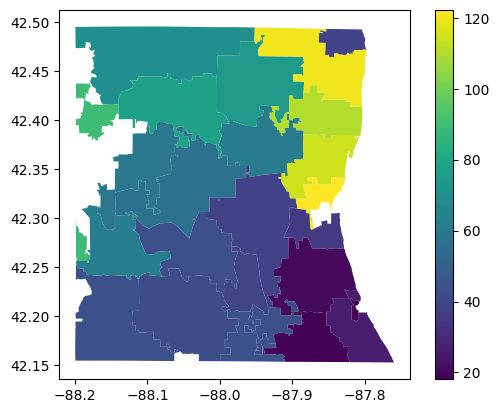

In [ ]:
df.plot("Diabetes", legend=True)

#Third Geospatial Dataset

In [ ]:
Crashes = gpd.read_file('Crash_Data.geojson')
Crashes

,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,...,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude,geometry
0,1,2598369,2012-01-01 07:25:00+00:00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,...,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.421910,-111.952210,POINT (-111.95221 33.42191)
1,2,2593420,2012-01-01 11:45:00+00:00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,0.0,0.0,...,NaN,None,None,None,None,None,None,33.423190,-111.937690,POINT (-111.93769 33.42319)
2,3,2588493,2012-01-01 18:07:00+00:00,2012,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,...,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.418420,-111.891960,POINT (-111.89196 33.41842)
3,4,2584449,2012-01-02 00:03:00+00:00,2012,11th St,Judd St,200.112,Not Junction Related,0.0,0.0,...,NaN,None,East,Properly Parked,None,None,None,33.417790,-111.947910,POINT (-111.94791 33.41779)
4,5,2592211,2012-01-02 00:12:00+00:00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,...,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.349560,-111.928470,POINT (-111.92847 33.34956)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48877,48878,4073065,2023-08-11 23:59:00+00:00,2023,Baseline Rd,I-10 Exit 155 A1-Ramp,93.000,Intersection T Inter 203,0.0,0.0,...,42.0,Female,East,Slowing In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.378267,-111.968937,POINT (-111.96894 33.37827)
48878,48879,4073975,2023-08-16 17:32:00+00:00,2023,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,...,40.0,Female,South,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.407496,-111.892005,POINT (-111.89200 33.40750)
48879,48880,4075579,2023-08-16 23:05:00+00:00,2023,I-10 Exit 157 A-Ramp,None,0.000,Intersection Related 206,3.0,0.0,...,27.0,Male,South,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.349286,-111.972763,POINT (-111.97276 33.34929)
48880,48881,4077064,2023-08-19 03:21:00+00:00,2023,SR-202 Exit 5 A-Ramp,None,0.000,Entrance Exit Ramp 205,0.0,0.0,...,47.0,Male,East,Making Right Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.437169,-111.961075,POINT (-111.96108 33.43717)


In [ ]:
Crashes.columns

Index(['OBJECTID', 'Incidentid', 'DateTime', 'Year', 'StreetName',
       'CrossStreet', 'Distance', 'JunctionRelation', 'Totalinjuries',
       'Totalfatalities', 'Injuryseverity', 'Collisionmanner',
       'Lightcondition', 'Weather', 'SurfaceCondition', 'Unittype_One',
       'Age_Drv1', 'Gender_Drv1', 'Traveldirection_One', 'Unitaction_One',
       'Violation1_Drv1', 'AlcoholUse_Drv1', 'DrugUse_Drv1', 'Unittype_Two',
       'Age_Drv2', 'Gender_Drv2', 'Traveldirection_Two', 'Unitaction_Two',
       'Violation1_Drv2', 'AlcoholUse_Drv2', 'DrugUse_Drv2', 'Latitude',
       'Longitude', 'geometry'],
      dtype='object')

In [ ]:
Crashes.dtypes

OBJECTID                             int64
Incidentid                           int64
DateTime               datetime64[ns, UTC]
Year                                 int64
StreetName                          object
CrossStreet                         object
Distance                           float64
JunctionRelation                    object
Totalinjuries                      float64
Totalfatalities                    float64
Injuryseverity                      object
Collisionmanner                     object
Lightcondition                      object
Weather                             object
SurfaceCondition                    object
Unittype_One                        object
Age_Drv1                           float64
Gender_Drv1                         object
Traveldirection_One                 object
Unitaction_One                      object
Violation1_Drv1                     object
AlcoholUse_Drv1                     object
DrugUse_Drv1                        object
Unittype_Tw

In [ ]:
Crashes[['Totalinjuries', 'Latitude']].sort_values(by=['Totalinjuries'], ascending=False)

,Totalinjuries,Latitude
30316,9.0,33.350210
14339,9.0,33.422030
40677,9.0,33.422325
13036,9.0,33.421900
20860,8.0,33.430650
...,...,...
21354,0.0,33.378240
21355,0.0,33.336490
21357,0.0,33.392850
48881,0.0,33.378188


In [ ]:
Crashes['Totalinjuries'] = (Crashes['Totalinjuries'] / 1000)

<Axes: >

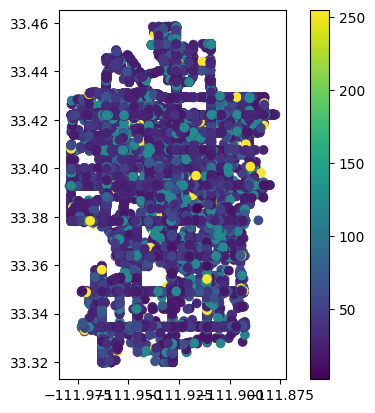

In [ ]:
Crashes.plot("Age_Drv1", legend=True)

# Fourth Geospatial Dataset

In [ ]:
YSA = gpd.read_file('Youth_Substance_Abuse.geojson')
YSA

,Year,Date,Type,Substance,Past_30_Day_Use_Percent,ObjectId,geometry
0,2016,2016-12-31 07:00:00+00:00,Survey Response,Alcohol,24.3,1,None
1,2016,2016-12-31 07:00:00+00:00,Survey Response,Marijuana,16.1,2,None
2,2016,2016-12-31 07:00:00+00:00,Survey Response,Prescription Drug Misuse,5.4,3,None
3,2016,2016-12-31 07:00:00+00:00,Survey Response,Prescription Pain Reliever Misuse,4.2,4,None
4,2018,2018-12-31 07:00:00+00:00,Survey Response,Alcohol,18.2,5,None
5,2018,2018-12-31 07:00:00+00:00,Survey Response,Marijuana,18.3,6,None
6,2018,2018-12-31 07:00:00+00:00,Survey Response,Prescription Drug Misuse,5.6,7,None
7,2018,2018-12-31 07:00:00+00:00,Survey Response,Prescription Pain Reliever Misuse,3.9,8,None
8,2020,2020-12-31 07:00:00+00:00,Survey Response,Alcohol,15.9,9,None
9,2020,2020-12-31 07:00:00+00:00,Survey Response,Marijuana,16.6,10,None


In [ ]:
YSA.columns

Index(['Year', 'Date', 'Type', 'Substance', 'Past_30_Day_Use_Percent',
       'ObjectId', 'geometry'],
      dtype='object')

In [ ]:
YSA.dtypes

Year                                     int64
Date                       datetime64[ns, UTC]
Type                                    object
Substance                               object
Past_30_Day_Use_Percent                float64
ObjectId                                 int64
geometry                              geometry
dtype: object

In [ ]:
YSA[['Year', 'Substance']].sort_values(by=['Year'], ascending=False)

,Year,Substance
15,2022,Prescription Pain Reliever Misuse
14,2022,Prescription Drug Misuse
13,2022,Marijuana
12,2022,Alcohol
10,2020,Prescription Drug Misuse
11,2020,Prescription Pain Reliever Misuse
18,2020,Prescription Drug Misuse
17,2020,Marijuana
16,2020,Alcohol
19,2020,Prescription Pain Reliever Misuse


In [ ]:

YSA['Year'] = (YSA['Year'] / 1000)

ValueError: ignored

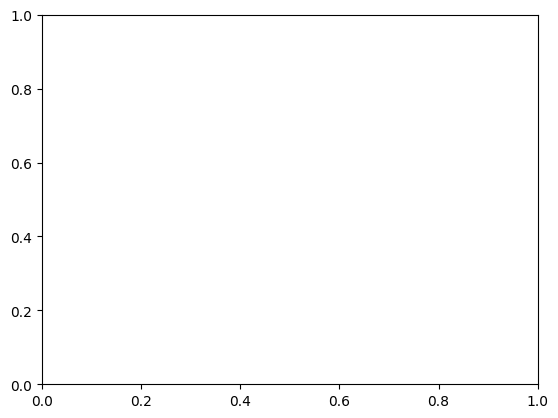

In [ ]:
YSA.plot("ObjectId", legend=True)

# Fifth Geospatial Dataset

In [ ]:
GS = gpd.read_file('General_Offenses.geojson')
GS